# Introduction

In this project, we used Supervised Learning to train an agent to complete a simplified version of our assigment in Project 1 of this class: the game Exactly One Mazes.

This agent will be trained in order for it to learn how to win the game.

The objective of the game is to have the player cross from the bottom-left to the top right square, without crossing the same L shape more than one time. The player also must not navigate sections of the board he has already visited.

The Player can move in any direction, as long as the square he is in does not belong to an already visited L shape.

# Required Libraries and Tools

● OpenAI Gym - A framework that acts as a playground for testing agents, using
controlled environments;

● Numpy - A library for processing data in arrays;

● Matplotlib and Seaborn - Data visualization libraries to draw plots and charts;

● Jupyter Notebooks - Interactive computing and development.

# Algorithms employed

To teach the agent, the following algorithms were implemented:

● Q-Learning - State–action–reward–state;

● SARSA - State–action–reward–state–action.

# Model

In this notebook, we are using a 4x4 board used with three L shapes, with them close enough to be easy to visualize a path.

The rewards were distributed in such a way that the algorithm was severely punished for every bad move:

● If visiting an already visited cell, -50 points

● If visiting an L shape for the second time, -50 points

● If it reached the end without visiting all L shapes, -50 points

● If landing in a neutral (0) cell, -0.75 points

● This was made so the algorithm would reach the end as fast as possible

● If visiting a newly discovered L shape, +10 points

● If it reached the end and visited all L shapes, +10 points


# Hyperparameters

● Learning rate: 0.5

● Discount factor: 0.6

● Epsilon: 0.1 and 0.01 decay rate

● Total training episodes: 500 with 100 steps maximum


## Algorithms code

In [4]:
import matplotlib.pyplot as plt
import random

def choose_action(state):
    exp_exp_tradeoff = random.uniform(0, 1)

    if exp_exp_tradeoff < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(qtable[state, :])
    return action


def update_qlearning(state, new_state, reward, action):
    qtable[state, action] = qtable[state, action] + learning_rate * (
        reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action]
    )


def update_sarsa(state, new_state, reward, action, new_action):
    qtable[state, action] = qtable[state, action] + learning_rate * (
        reward + gamma * qtable[new_state, new_action] - qtable[state, action]
    )


def qlearn(sarsa):
    global qtable
    success = 0
    for episode in range(total_episodes):
        state = env.reset()
        done = False
        total_rewards = 0
        for _ in range(max_steps):
            # Converting the state to a position on the table
            action = choose_action(state)
            new_state, reward, done, info = env.step(action)

            if sarsa:
                new_action = choose_action(new_state)
                update_sarsa(state, new_state, reward, action, new_action)
            else:
                update_qlearning(state, new_state, reward, action)

            total_rewards += reward

            state = new_state
            env.set_state(env.from_idx(new_state))

            if done:
                if total_rewards < 0:
                    print("Failed episode:", episode)
                else:
                    env.render()
                    success += 1
                print("Total reward for episode {}: {}".format(episode, total_rewards))
                break

        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(
            -decay_rate * episode
        )
        rewards.append(total_rewards)
        epsilons.append(epsilon)

    print("Score/time: " + str(sum(rewards) / total_episodes))
    print("success of", success/total_episodes)
    print(qtable)

    x = range(total_episodes)
    plt.plot(x, rewards)
    plt.xlabel("Episode")
    plt.ylabel("Training total reward")
    plt.title("Total rewards over all episodes in training")
    plt.show()

    plt.plot(epsilons)
    plt.xlabel("Episode")
    plt.ylabel("Epsilon")
    plt.title("Epsilon for episode")
    plt.show()

    qtable = np.zeros((env.observation_space.n, env.action_space.n))
    rewards.clear()
    epsilons.clear()


## Game board

In [9]:
from new_env import TakeTheLEnv

#### Default Board

In [12]:
env = TakeTheLEnv()
env.reset()
env.render()


    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾



#### Other boards (Simple)

In [35]:
env.set_board([ [2, 0, 0, 0],
                [2, 2, 2, 0],
                [1, 1, 1, 0],
                [0, 0, 1, 0]])
env.render()


    0   1   2   3
  _________________
0 | 2 | 0 | 0 | 0 |
1 | 2 | 2 | 2 | 0 |
2 | 1 | 1 | 1 | 0 |
3 | 0 | 0 | 1 | 0 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾



In [ ]:
env.set_board([ [2, 0, 0, 0],
                [2, 2, 2, 0],
                [1, 1, 1, 0],
                [0, 0, 1, 0]])
env.render()

In [31]:
env.set_board([ [1, 2, 0, 0],
                [1, 2, 2, 2],
                [1, 1, 0, 3],
                [0, 3, 3, 3]])
env.render()


    0   1   2   3
  _________________
0 | 1 | 2 | 0 | 0 |
1 | 1 | 2 | 2 | 2 |
2 | 1 | 1 | 0 | 3 |
3 | 0 | 3 | 3 | 3 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾



In [20]:
env.set_board([ [1, 3, 3, 0],
                [1, 0, 3, 2],
                [1, 1, 3, 2],
                [0, 0, 2, 2]])
env.render()


    0   1   2   3
  _________________
0 | 1 | 3 | 3 | 0 |
1 | 1 | 0 | 3 | 2 |
2 | 1 | 1 | 3 | 2 |
3 | 0 | 0 | 2 | 2 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾



#### Other Boards (Complex)

In [26]:
env.set_board([ [1, 1, 0, 2, 0],
                [0, 1, 3, 2, 0],
                [0, 1, 3, 2, 2],
                [0, 0, 3, 3, 4],
                [0, 0, 4, 4, 4]])
env.render()


    0   1   2   3   4
  _____________________
0 | 1 | 1 | 0 | 2 | 0 |
1 | 0 | 1 | 3 | 2 | 0 |
2 | 0 | 1 | 3 | 2 | 2 |
3 | 0 | 0 | 3 | 3 | 4 |
4 | 0 | 0 | 4 | 4 | 4 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾



In [13]:
env.set_board([ [1, 1, 2, 3, 0, 0],
                [4, 1, 2, 3, 3, 3],
                [4, 1, 2, 2, 0, 5],
                [4, 4, 6, 0, 0, 5],
                [0, 0, 6, 7, 5, 5],
                [0, 6, 6, 7, 7, 7]])
env.render()


    0   1   2   3   4   5
  _________________________
0 | 1 | 1 | 2 | 3 | 0 | 0 |
1 | 4 | 1 | 2 | 3 | 3 | 3 |
2 | 4 | 1 | 2 | 2 | 0 | 5 |
3 | 4 | 4 | 6 | 0 | 0 | 5 |
4 | 0 | 0 | 6 | 7 | 5 | 5 |
5 | 0 | 6 | 6 | 7 | 7 | 7 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾



## Defining hyperparameters

In [32]:
import numpy as np

qtable = np.zeros((env.observation_space.n, env.action_space.n))

total_episodes = 500  # the total number of episodes to run
max_steps = 100  # the maximum number of steps per episode

learning_rate = 0.5  # the learning rate

gamma = 0.6  # the discount factor

# the range for the exploration parameter epsilon
epsilon = 0.1
min_epsilon = 0.01
max_epsilon = 1.0
decay_rate = 0.01

rewards = []
epsilons = []

## Algorithms execution

#### Q-Learning

Q-LEARNING
Failed episode: 0
Total reward for episode 0: -2680
Failed episode: 1
Total reward for episode 1: -1630
Failed episode: 2
Total reward for episode 2: -830
Failed episode: 3
Total reward for episode 3: -920
Failed episode: 4
Total reward for episode 4: -680
Failed episode: 5
Total reward for episode 5: -180

    0   1   2   3
  _________________
0 | 1 | 2 | 0 | 0 |
1 | 1 | 2 | 2 | 2 |
2 | 1 | 1 | 0 | 3 |
3 | 0 | 3 | 3 | 3 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 6: 20

    0   1   2   3
  _________________
0 | 1 | 2 | 0 | 0 |
1 | 1 | 2 | 2 | 2 |
2 | 1 | 1 | 0 | 3 |
3 | 0 | 3 | 3 | 3 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 7: 20
Failed episode: 8
Total reward for episode 8: -180
Failed episode: 9
Total reward for episode 9: -320

    0   1   2   3
  _________________
0 | 1 | 2 | 0 | 0 |
1 | 1 | 2 | 2 | 2 |
2 | 1 | 1 | 0 | 3 |
3 | 0 | 3 | 3 | 3 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 10: 20

    0   1   2   3
  _________________
0 | 1 | 2 | 0 | 0 |
1 | 1 

Failed episode: 423
Total reward for episode 423: -20

    0   1   2   3
  _________________
0 | 1 | 2 | 0 | 0 |
1 | 1 | 2 | 2 | 2 |
2 | 1 | 1 | 0 | 3 |
3 | 0 | 3 | 3 | 3 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 424: 20

    0   1   2   3
  _________________
0 | 1 | 2 | 0 | 0 |
1 | 1 | 2 | 2 | 2 |
2 | 1 | 1 | 0 | 3 |
3 | 0 | 3 | 3 | 3 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 425: 20

    0   1   2   3
  _________________
0 | 1 | 2 | 0 | 0 |
1 | 1 | 2 | 2 | 2 |
2 | 1 | 1 | 0 | 3 |
3 | 0 | 3 | 3 | 3 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 426: 20

    0   1   2   3
  _________________
0 | 1 | 2 | 0 | 0 |
1 | 1 | 2 | 2 | 2 |
2 | 1 | 1 | 0 | 3 |
3 | 0 | 3 | 3 | 3 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 427: 20

    0   1   2   3
  _________________
0 | 1 | 2 | 0 | 0 |
1 | 1 | 2 | 2 | 2 |
2 | 1 | 1 | 0 | 3 |
3 | 0 | 3 | 3 | 3 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 428: 20

    0   1   2   3
  _________________
0 | 1 | 2 | 0 | 0 |
1 | 1 | 2 | 2 | 2 |
2 

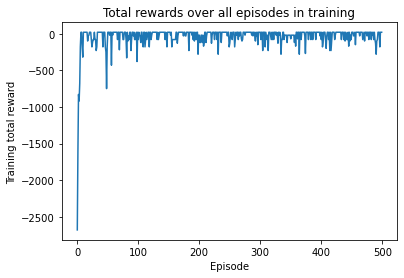

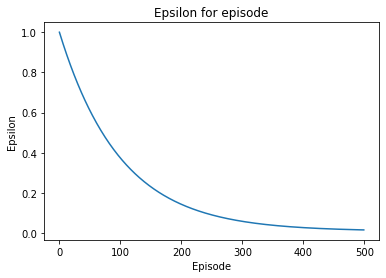

In [33]:
qlearn(False)

#### SARSA

Failed episode: 0
Total reward for episode 0: -2630
Failed episode: 1
Total reward for episode 1: -710
Failed episode: 2
Total reward for episode 2: -1280
Failed episode: 3
Total reward for episode 3: -450
Failed episode: 4
Total reward for episode 4: -200

    0   1   2   3
  _________________
0 | 2 | 0 | 0 | 0 |
1 | 2 | 2 | 2 | 0 |
2 | 1 | 1 | 1 | 0 |
3 | 0 | 0 | 1 | 0 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 5: 0

    0   1   2   3
  _________________
0 | 2 | 0 | 0 | 0 |
1 | 2 | 2 | 2 | 0 |
2 | 1 | 1 | 1 | 0 |
3 | 0 | 0 | 1 | 0 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 6: 0

    0   1   2   3
  _________________
0 | 2 | 0 | 0 | 0 |
1 | 2 | 2 | 2 | 0 |
2 | 1 | 1 | 1 | 0 |
3 | 0 | 0 | 1 | 0 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 7: 0

    0   1   2   3
  _________________
0 | 2 | 0 | 0 | 0 |
1 | 2 | 2 | 2 | 0 |
2 | 1 | 1 | 1 | 0 |
3 | 0 | 0 | 1 | 0 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 8: 0

    0   1   2   3
  _________________
0 | 2 | 0 | 0 | 0 |
1 | 


    0   1   2   3
  _________________
0 | 2 | 0 | 0 | 0 |
1 | 2 | 2 | 2 | 0 |
2 | 1 | 1 | 1 | 0 |
3 | 0 | 0 | 1 | 0 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 400: 0

    0   1   2   3
  _________________
0 | 2 | 0 | 0 | 0 |
1 | 2 | 2 | 2 | 0 |
2 | 1 | 1 | 1 | 0 |
3 | 0 | 0 | 1 | 0 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 401: 0

    0   1   2   3
  _________________
0 | 2 | 0 | 0 | 0 |
1 | 2 | 2 | 2 | 0 |
2 | 1 | 1 | 1 | 0 |
3 | 0 | 0 | 1 | 0 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 402: 0
Failed episode: 403
Total reward for episode 403: -100
Failed episode: 404
Total reward for episode 404: -40

    0   1   2   3
  _________________
0 | 2 | 0 | 0 | 0 |
1 | 2 | 2 | 2 | 0 |
2 | 1 | 1 | 1 | 0 |
3 | 0 | 0 | 1 | 0 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total reward for episode 405: 0
Failed episode: 406
Total reward for episode 406: -40

    0   1   2   3
  _________________
0 | 2 | 0 | 0 | 0 |
1 | 2 | 2 | 2 | 0 |
2 | 1 | 1 | 1 | 0 |
3 | 0 | 0 | 1 | 0 |
  ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾

Total rew

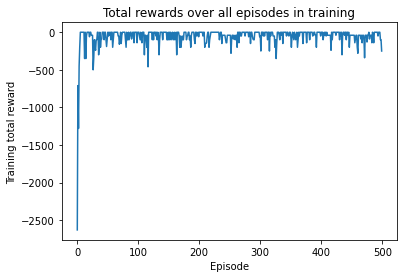

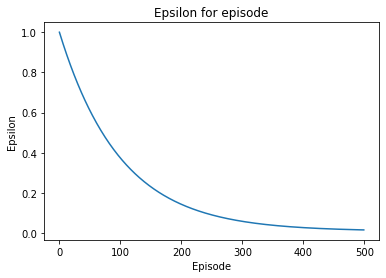

In [38]:
qlearn(True)